In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np

In [9]:
# 处理一些冲突
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 设置字体
plt.rcParams["axes.unicode_minus"] = False  # 该语句解决图像中的“-”负号的乱码问题

In [10]:
# 数据读取
humidity = pd.read_excel('./dataset/3-humidity.xls')  # 湿度数据
bio_amount = pd.read_excel('./dataset/15-plant-bio.xlsx', sheet_name='2016-2020物种数据库')  # 生物量数据
bio_amount = bio_amount.drop('Unnamed: 15', axis=1)  # 去除多余的一列

In [11]:
"""
由于生物量只有5，6，7，8，9月这几个月的数据
同样湿度数据也只取这几个月的数据
"""
# print(humidity.info())
months = [5, 6, 7, 8, 9]
humidity_sub = humidity[humidity['月份'].isin(months)]
humidity_sub.pop('经度(lon)')
humidity_sub.pop('纬度(lat)')

humidity_sub.columns

Index(['月份', '年份', '10cm湿度(kg/m2)', '40cm湿度(kg/m2)', '100cm湿度(kg/m2)',
       '200cm湿度(kg/m2)'],
      dtype='object')

In [12]:
# 将生物量的日期转为月份
# 提取月份, 注意到有一个6月1号的数据，可以将看作5月的数据(特殊处理)
bio_amount['月份'] = bio_amount['日期'] \
    .apply(lambda x: int(x.split('.')[1]) if int(x.split('.')[2]) != 1 else int(x.split('.')[1]) - 1) \
    .astype('int64')  # 这里要注意数据是str类型，所以要转化为int类型，不然不能进行数据运算，导致结果有问题

In [38]:
# merge数据
all_df = bio_amount.merge(humidity_sub, on=['年份', '月份'], how='left')
all_df['年份'] = all_df['年份'].astype('str')

# 只保留需要的列
needs = ['年份', '月份', '轮次', '处理', '植物种名', '干重(g)', '10cm湿度(kg/m2)',
         '40cm湿度(kg/m2)', '100cm湿度(kg/m2)', '200cm湿度(kg/m2)']
all_df = all_df[needs]
all_df

,年份,月份,轮次,处理,植物种名,干重(g),10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2)
0,2019,5,牧前,轻牧（3天）,大针茅,25.41,15.88,44.71,62.31,167.02
1,2019,5,牧前,轻牧（3天）,羊草,0.64,15.88,44.71,62.31,167.02
2,2019,5,牧前,轻牧（3天）,苔草,0.99,15.88,44.71,62.31,167.02
3,2019,5,牧前,轻牧（3天）,糙隐子草,1.25,15.88,44.71,62.31,167.02
4,2019,5,牧前,轻牧（3天）,知母,0.30,15.88,44.71,62.31,167.02
...,...,...,...,...,...,...,...,...,...,...
10876,2016,9,第四轮牧后,无牧（0天）,米氏冰草,62.43,16.22,33.22,43.44,167.39
10877,2016,9,第四轮牧后,无牧（0天）,羊草,90.01,16.22,33.22,43.44,167.39
10878,2016,9,第四轮牧后,无牧（0天）,大针茅,29.93,16.22,33.22,43.44,167.39
10879,2016,9,第四轮牧后,无牧（0天）,知母,18.87,16.22,33.22,43.44,167.39


##  数据可视化
看看基本的数据分布，进行粗略的数据分析，看看放牧与这些数据直接的关系

###  1. 看看不同植物与不同月份下的湿度数据分布，因为湿度和放牧之间数据变化不大，只要展示月份之间的变化即可

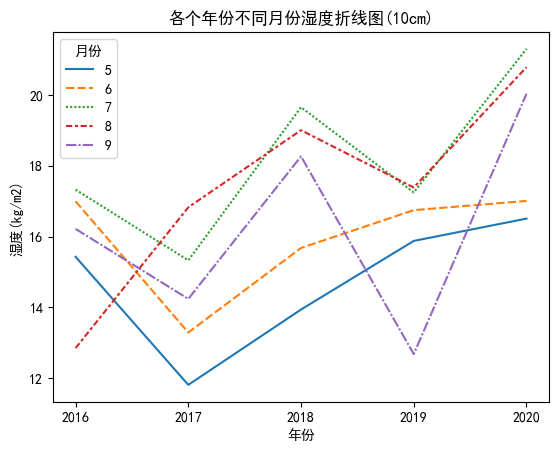

In [14]:
humidity_process = all_df[['年份', '月份', '处理',  '10cm湿度(kg/m2)', '40cm湿度(kg/m2)',
                            '100cm湿度(kg/m2)', '200cm湿度(kg/m2)']].drop_duplicates().reset_index()

table10 = pd.pivot_table(humidity_process, values='10cm湿度(kg/m2)', index=['年份'], columns=['月份'])

sns.lineplot(data=table10)
plt.title('各个年份不同月份湿度折线图(10cm)')
plt.ylabel('湿度(kg/m2)')
plt.savefig('./humi.png')

In [37]:
humidity_process

,index,年份,月份,处理,10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2)
0,0,2019,5,轻牧（3天）,15.88,44.71,62.31,167.02
1,32,2019,5,中牧（6天）,15.88,44.71,62.31,167.02
2,51,2019,5,重牧（12天）,15.88,44.71,62.31,167.02
3,161,2019,5,无牧（0天）,15.88,44.71,62.31,167.02
4,284,2019,6,轻牧（3天）,16.75,43.84,60.77,166.95
...,...,...,...,...,...,...,...,...
95,10450,2016,8,无牧（0天）,12.85,33.21,45.51,167.42
96,10531,2016,9,轻牧（3天）,16.22,33.22,43.44,167.39
97,10624,2016,9,中牧（6天）,16.22,33.22,43.44,167.39
98,10713,2016,9,重牧（12天）,16.22,33.22,43.44,167.39


Text(0, 0.5, '湿度(kg/m2)')

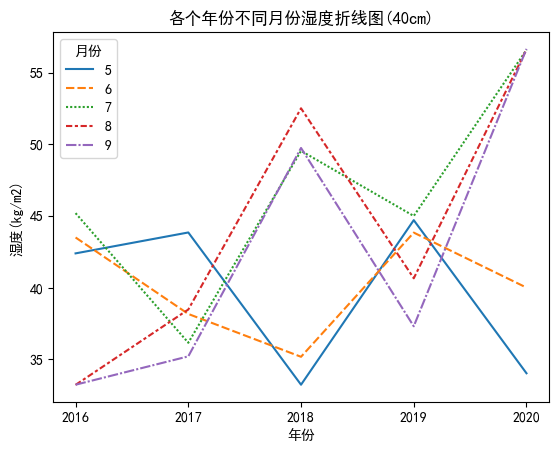

In [15]:
table40 = pd.pivot_table(humidity_process, values='40cm湿度(kg/m2)', index=['年份'], columns=['月份'])

sns.lineplot(data=table40)
plt.title('各个年份不同月份湿度折线图(40cm)')
plt.ylabel('湿度(kg/m2)')

Text(0, 0.5, '湿度(kg/m2)')

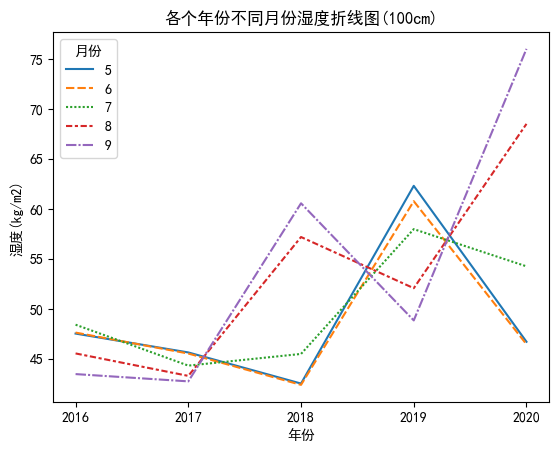

In [16]:
table100 = pd.pivot_table(humidity_process, values='100cm湿度(kg/m2)', index=['年份'], columns=['月份'])

sns.lineplot(data=table100)
plt.title('各个年份不同月份湿度折线图(100cm)')
plt.ylabel('湿度(kg/m2)')

Text(0, 0.5, '湿度(kg/m2)')

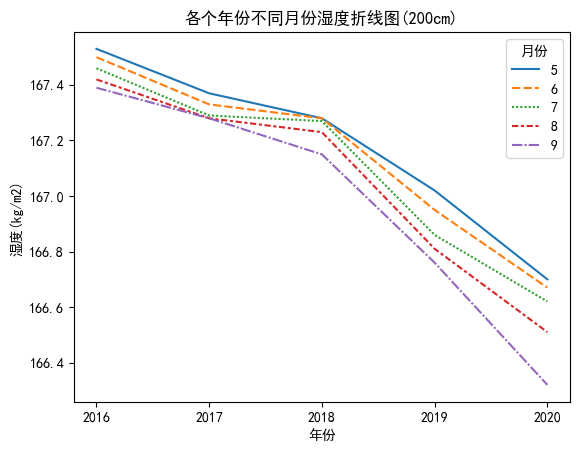

In [17]:
table200 = pd.pivot_table(humidity_process, values='200cm湿度(kg/m2)', index=['年份'], columns=['月份'])

sns.lineplot(data=table200)
plt.title('各个年份不同月份湿度折线图(200cm)')
plt.ylabel('湿度(kg/m2)')

1. 可以很好的从第四个图进行分析，放牧对于湿度是有一定程度上影响的
2. 

### 2. 生物量与放牧的关系

In [18]:
bio_amount_process = all_df[(all_df['年份'] == '2016') & (all_df['月份'] == 5)]

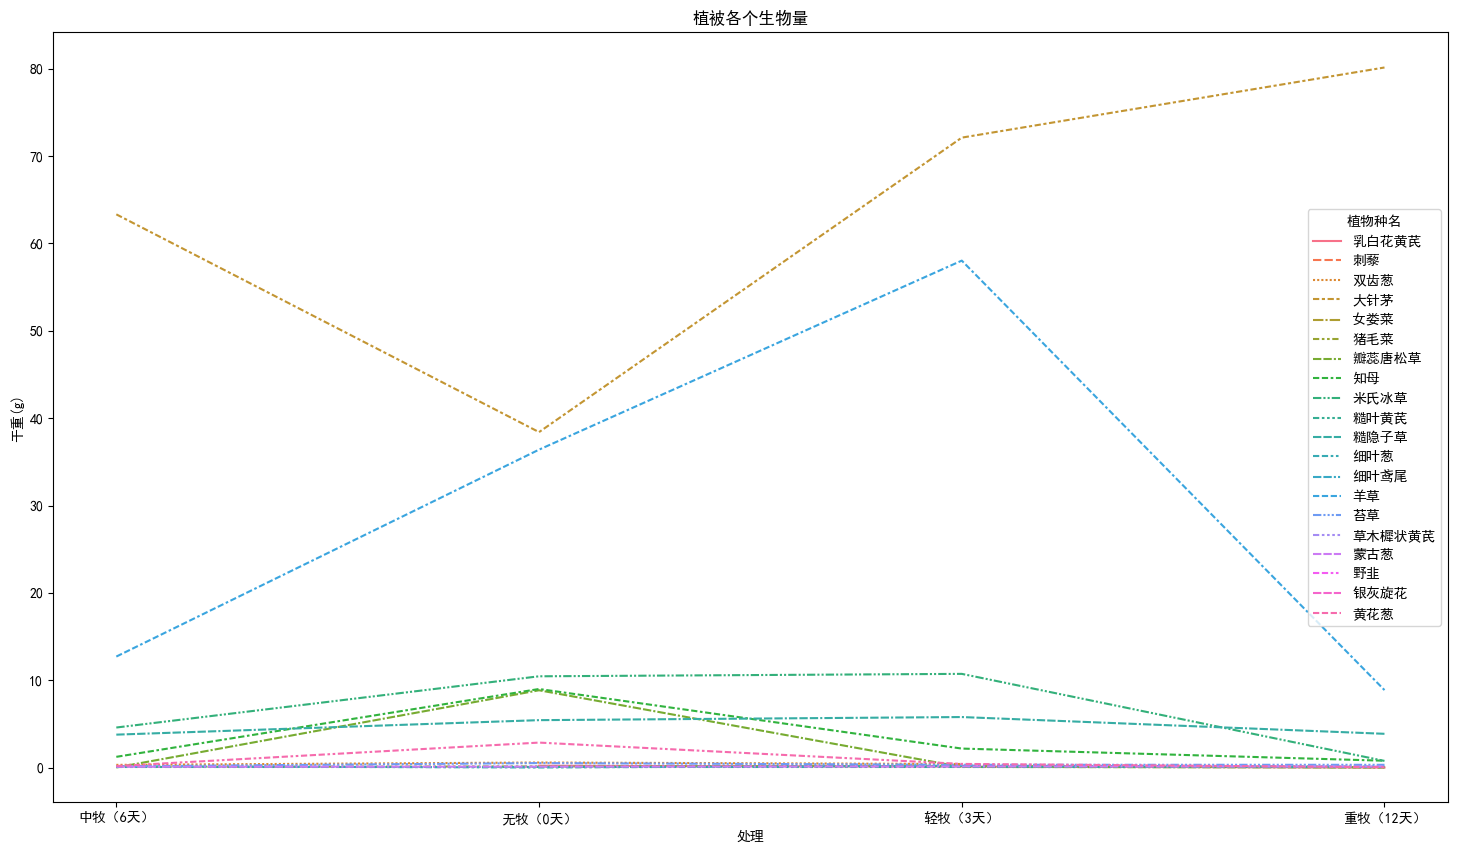

In [31]:
plt.figure(figsize=(18,10))
table2016_5 = pd.pivot_table(bio_amount_process, values='干重(g)', index=['处理'], columns=['植物种名'])
sns.lineplot(data=table2016_5,sizes=(50,50))
plt.title('植被各个生物量')
plt.ylabel('干重(g)')
plt.savefig('./bionum165.png')

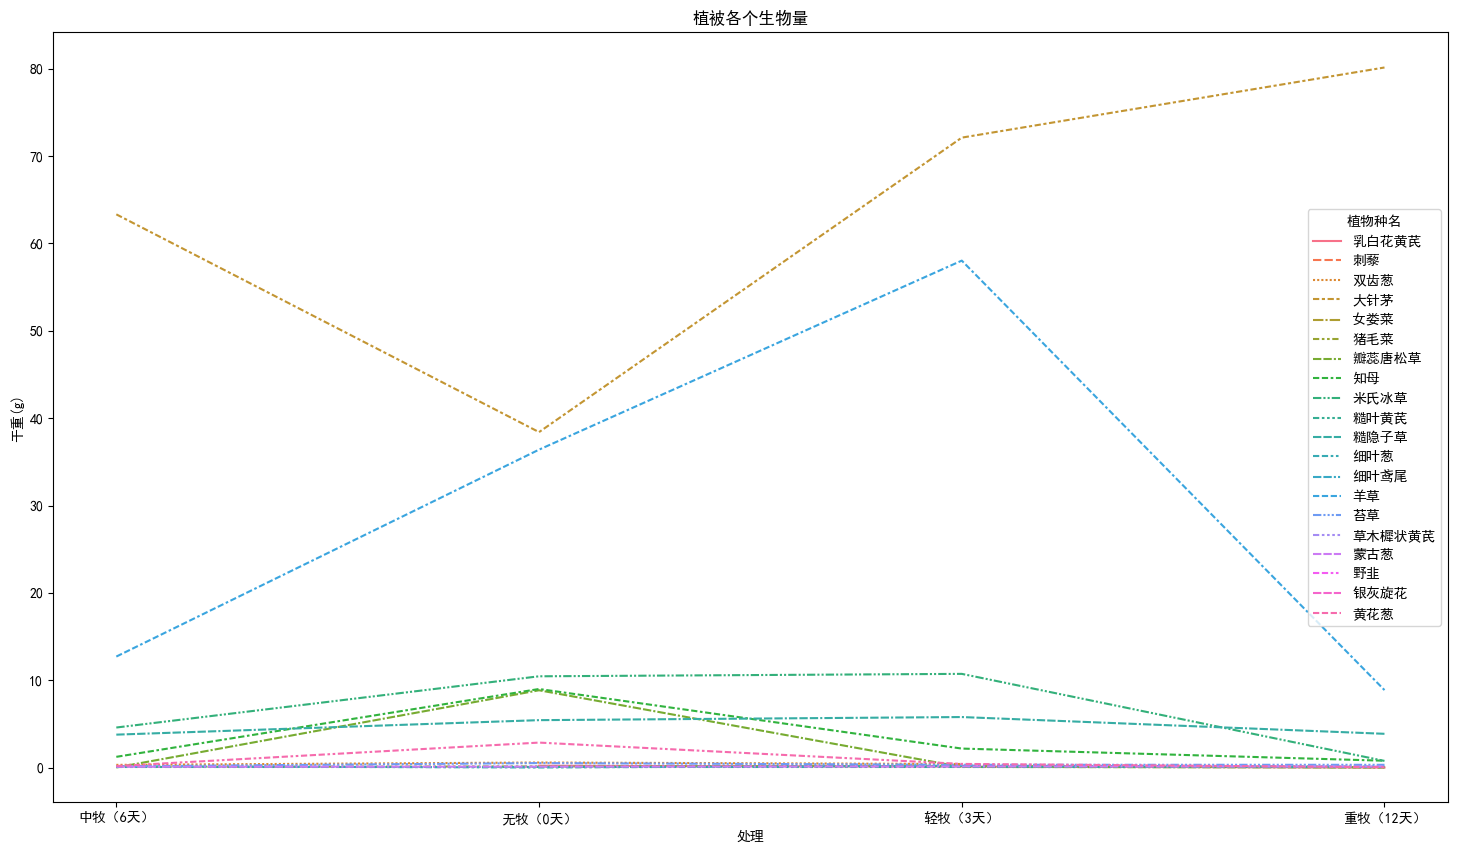

In [32]:
plt.figure(figsize=(18,10))

bio_amount_process = all_df[(all_df['年份'] == '2016') & (all_df['月份'] == 6)]
table2016_6 = pd.pivot_table(bio_amount_process, values='干重(g)', index=['处理'], columns=['植物种名'])
sns.lineplot(data=table2016_6)
plt.title('植被各个生物量')
plt.ylabel('干重(g)')
plt.savefig('./bionum166.png')

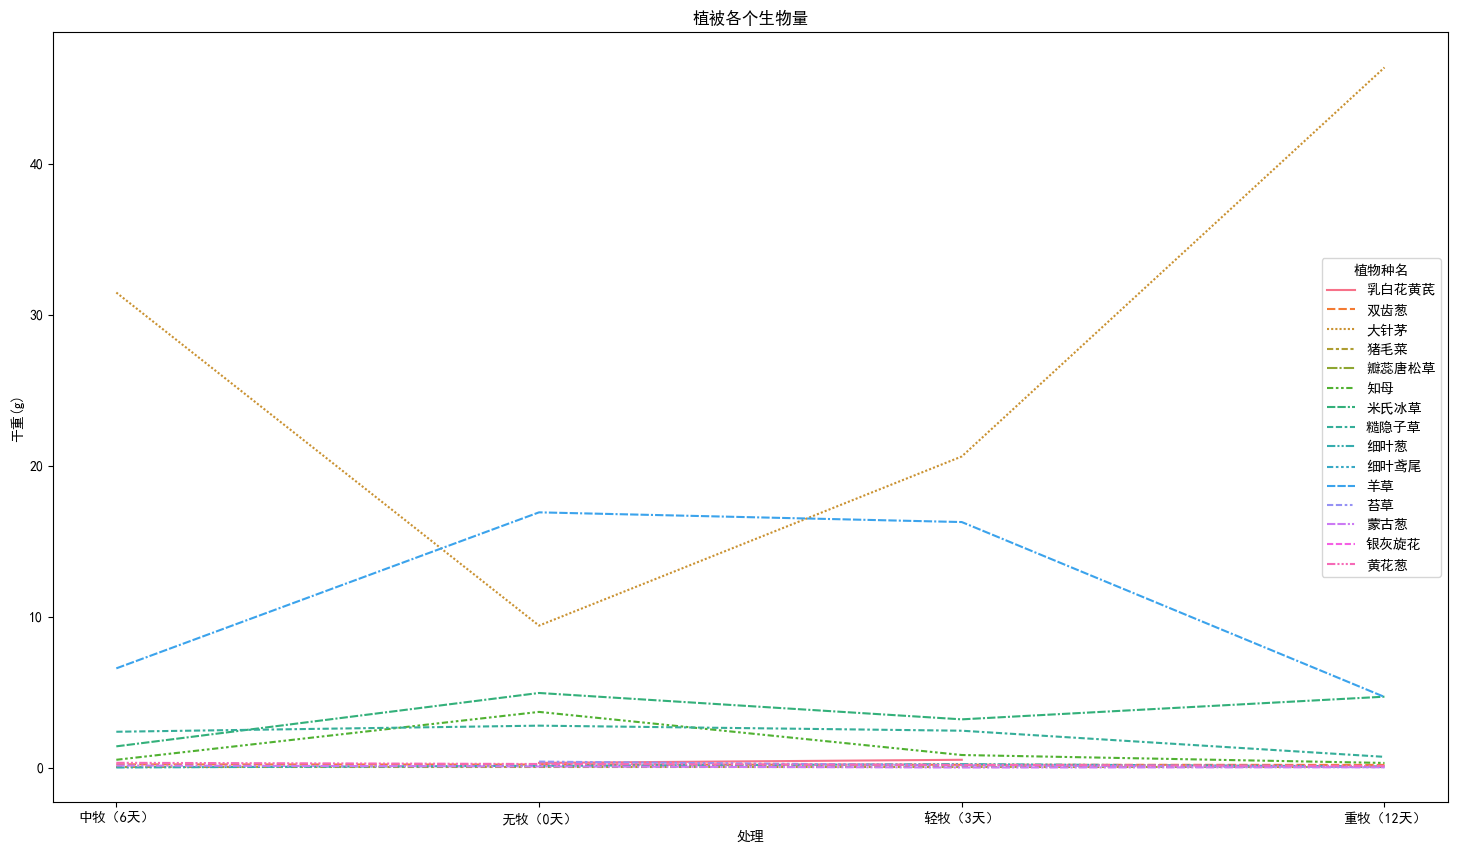

In [33]:
plt.figure(figsize=(18,10))

bio_amount_process = all_df[(all_df['年份'] == '2017') & (all_df['月份'] == 5)]
table2017_5 = pd.pivot_table(bio_amount_process, values='干重(g)', index=['处理'], columns=['植物种名'])
sns.lineplot(data=table2017_5)
plt.title('植被各个生物量')
plt.ylabel('干重(g)')
plt.savefig('./bionum175.png')

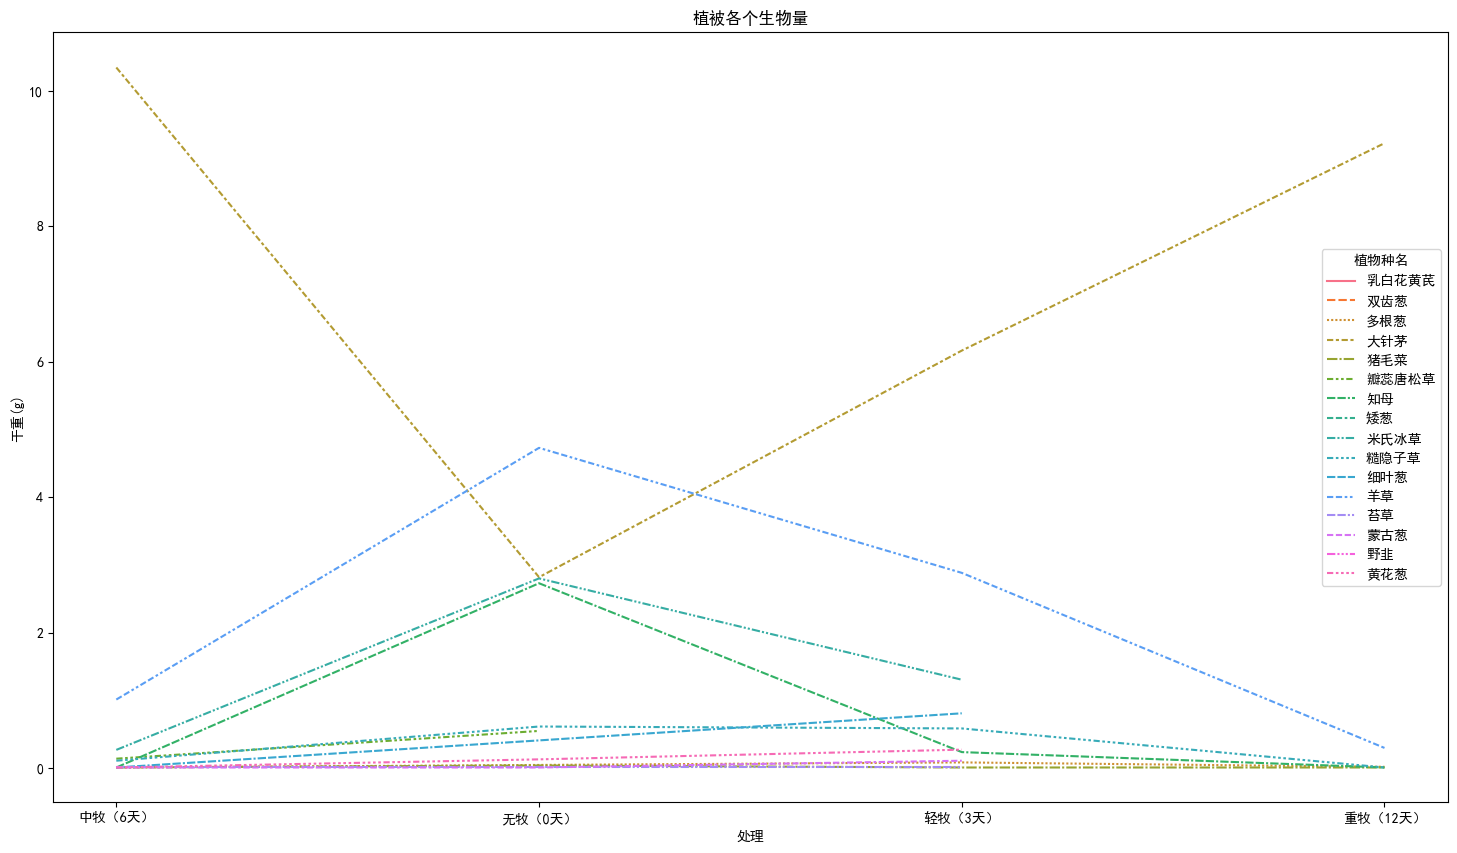

In [34]:
plt.figure(figsize=(18,10))
bio_amount_process = all_df[(all_df['年份'] == '2018') & (all_df['月份'] == 5)]
table2018_5 = pd.pivot_table(bio_amount_process, values='干重(g)', index=['处理'], columns=['植物种名'])
sns.lineplot(data=table2018_5)
plt.title('植被各个生物量')
plt.ylabel('干重(g)')
plt.savefig('./bionum185.png')

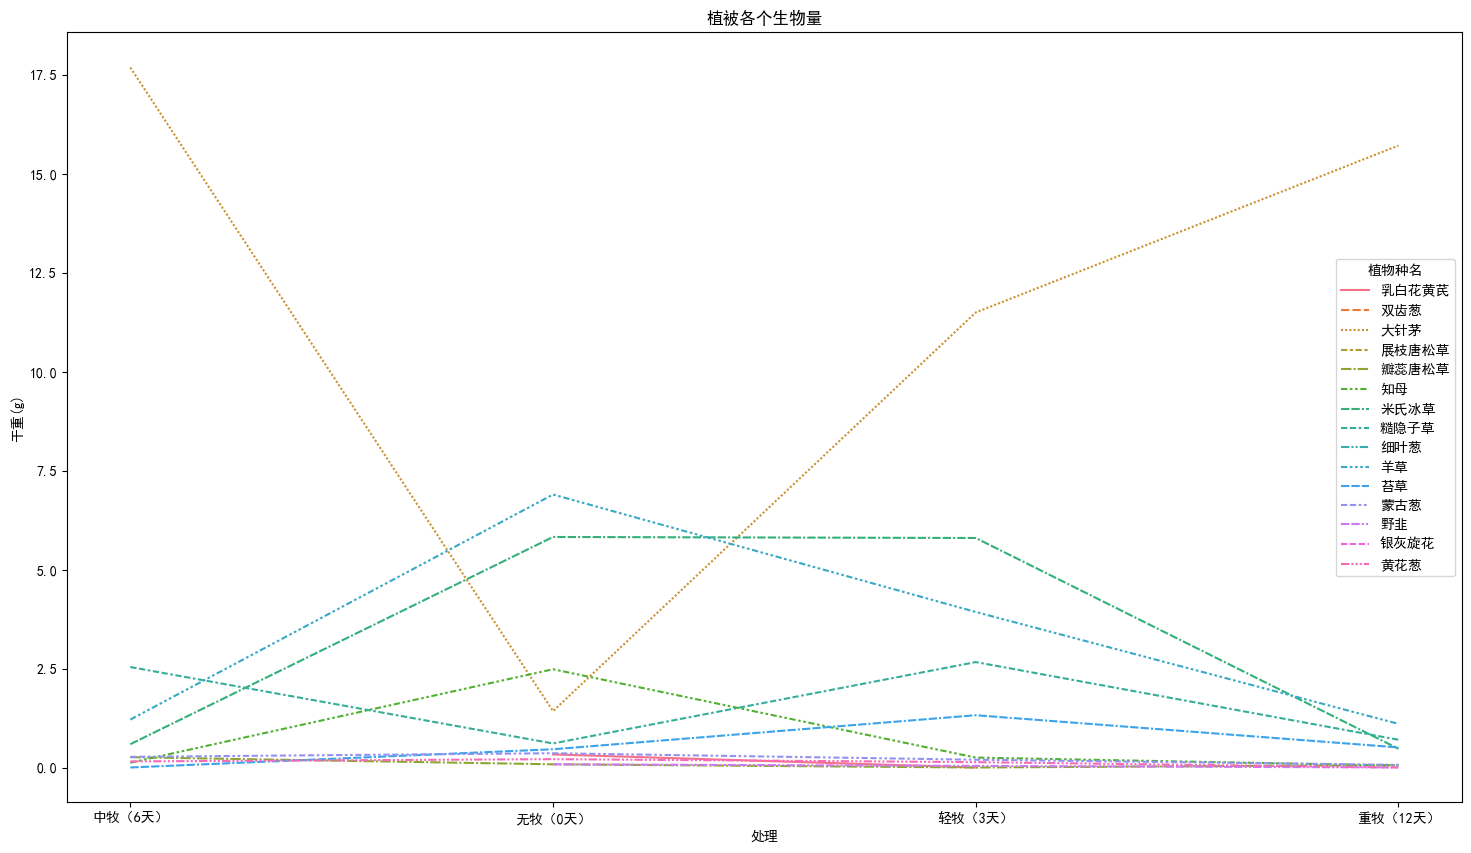

In [35]:
plt.figure(figsize=(18,10))

bio_amount_process = all_df[(all_df['年份'] == '2019') & (all_df['月份'] == 5)]
table2019_5 = pd.pivot_table(bio_amount_process, values='干重(g)', index=['处理'], columns=['植物种名'])
sns.lineplot(data=table2019_5)
plt.title('植被各个生物量')
plt.ylabel('干重(g)')
plt.savefig('./bionum195.png')

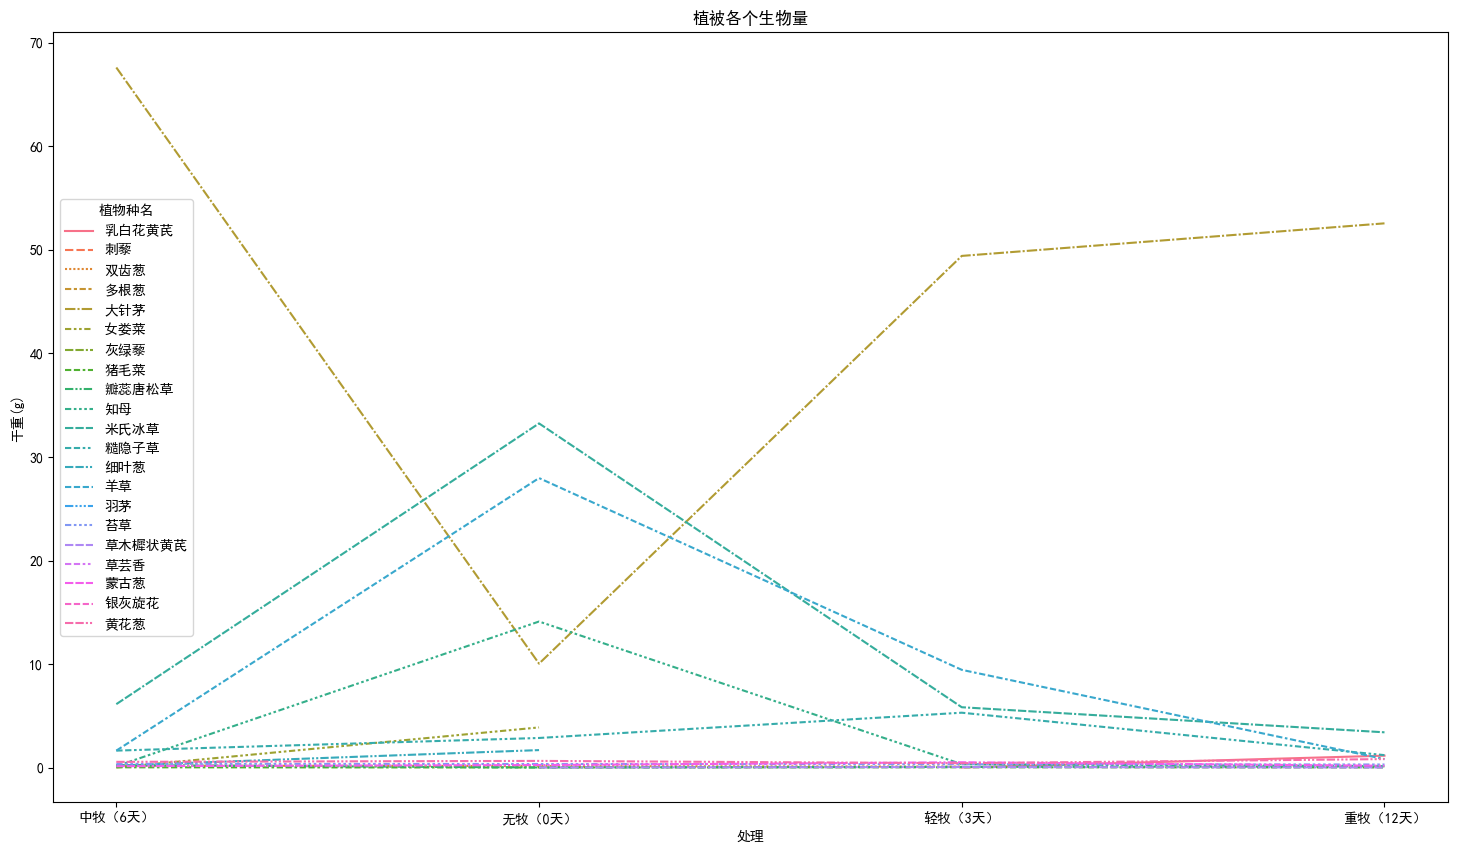

In [36]:
plt.figure(figsize=(18,10))

bio_amount_process = all_df[(all_df['年份'] == '2020') & (all_df['月份'] == 5)]
table2020_5 = pd.pivot_table(bio_amount_process, values='干重(g)', index=['处理'], columns=['植物种名'])
sns.lineplot(data=table2020_5)
plt.title('植被各个生物量')
plt.ylabel('干重(g)')
plt.savefig('./bionum205.png')

从上面的展示图来看，不好分析，因为像*黄色*的那根线还向上增长，*大多数数据*都是*平缓*的都没啥变化，对于一种植物很难分析

In [28]:
# 所以我们聚合下数据
bio_amount_process_stags = all_df.groupby(['年份', '月份', '处理']).agg({
    '干重(g)': sum
}).reset_index()
list_sorted = ['无牧（0天）', '轻牧（3天）', '中牧（6天）', '重牧（12天）']
bio_amount_process_stags['处理'] = bio_amount_process_stags['处理'].astype('category').cat.set_categories(list_sorted)  # 自定义排序
bio_amount_process_stags = bio_amount_process_stags.sort_values(by=['年份', '月份', '处理'], ascending=True)
bio_amount_process_stags

,年份,月份,处理,干重(g)
1,2016,5,无牧（0天）,870.16
2,2016,5,轻牧（3天）,1047.21
0,2016,5,中牧（6天）,1067.33
3,2016,5,重牧（12天）,861.18
5,2016,6,无牧（0天）,1463.34
...,...,...,...,...
95,2020,8,重牧（12天）,2301.29
97,2020,9,无牧（0天）,2691.88
98,2020,9,轻牧（3天）,4246.77
96,2020,9,中牧（6天）,3445.48


Text(0, 0.5, '植被生物量')

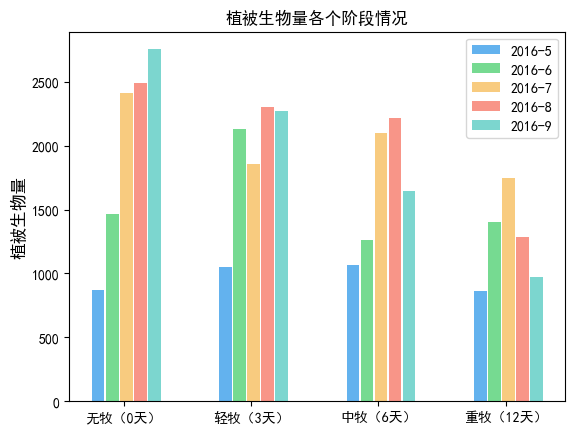

In [29]:
table = pd.pivot_table(bio_amount_process_stags, values='干重(g)', index=['年份', '月份'], columns=['处理'])

# for year in ['2016', '2017', '2018', '2019', '2020']:
#     sns.lineplot(table.loc[year])

tmp = table.loc['2016']

fig, ax = plt.subplots()

x = np.arange(4)  # 标签位置
width = 0.1  # 柱状图的宽度

rects1 = ax.bar(x - width * 2, tmp.loc[5], width, label='2016-5', color='#63b2ee')
rects2 = ax.bar(x - width + 0.01, tmp.loc[6], width, label='2016-6', color='#76da91')
rects3 = ax.bar(x + 0.02, tmp.loc[7], width, label='2016-7', color='#f8cb7f')
rects4 = ax.bar(x + width + 0.03, tmp.loc[8], width, label='2016-8', color='#f89588')
rects5 = ax.bar(x + width * 2 + 0.04, tmp.loc[9], width, label='2016-9', color='#7cd6cf')

ax.set_xticks(x)
ax.set_xticklabels(['无牧（0天）', '轻牧（3天）', '中牧（6天）', '重牧（12天）'])
ax.legend()
ax.set_title('植被生物量各个阶段情况')
ax.set_ylabel('植被生物量', fontsize=12)

这里整体可以看出植被生物量随着放牧强度递减的关系

In [ ]:
bio_amount_process_month = all_df.groupby(['年份', '月份']).agg({
    '干重(g)': sum
}).reset_index()
list_sorted = ['无牧（0天）', '轻牧（3天）', '中牧（6天）', '重牧（12天）']
bio_amount_process_month['处理'] = bio_amount_process_month['处理'].astype('category').cat.set_categories(list_sorted)  # 自定义排序
bio_amount_process_month = bio_amount_process_month.sort_values(by=['年份', '月份', '处理'], ascending=True)
bio_amount_process_month